### Wstęp do Uczenia Maszynowego 
##### Laboratorium 11

In [1]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
modele = []
acc_train = []
acc_test = []

### Bagging - *bootstrap aggregation*

<img src="bagging.webp"  width="500"/>


*https://ai.plainenglish.io/boosting-performance-a-comprehensive-guide-to-bagging-ensemble-models-f890f7ad20cc*

### Zadanie 1
Przyjrzyjmy się danych dotyczących raka piersi, zbiór danych to odpowiednio `X.csv` oraz `y.csv`. Zbuduj komitet składający się z 50 modeli `knn`. W tym celu wykorzystaj funkcję `BaggingClassifier()`.

Dokonaj optymalizacji parametru $k$ (liczba sąsiadów) dla modeli `knn`.


Pamiętaj o skalowaniu danych oraz sprawdzeniu czy są braki danych! Jeżeli są, spróbuj zastosować `KNNImputer()` z liczbą sąsiadów równą 3.

*Więcej o zbiorze danych: https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original*

In [3]:
y = pd.read_csv("y.csv")
X = pd.read_csv("X.csv")

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [5]:
pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 3)),
    ('scaler', StandardScaler()),
    ('bagging', BaggingClassifier(estimator = KNeighborsClassifier(), 
                                  n_estimators = 50))
])

In [6]:
pipeline.fit(X_train, y_train.Class)

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                ('scaler', StandardScaler()),
                ('bagging',
                 BaggingClassifier(estimator=KNeighborsClassifier(),
                                   n_estimators=50))])

In [7]:
modele.append("BaggingClassifier50KNN")
acc_train.append(pipeline.score(X_train, y_train.Class))
acc_test.append(pipeline.score(X_test, y_test.Class))

In [8]:
pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 3)),
    ('scaler', StandardScaler()),
    ('bagging', BaggingClassifier(estimator = KNeighborsClassifier(), 
                                  n_estimators = 50))
])

params = {
    'bagging__estimator__n_neighbors': [3, 4, 5, 6, 7]
    }

grid_pipeline = GridSearchCV(pipeline,
                             cv = 6,
                             param_grid = params)

In [9]:
grid_pipeline.fit(X_train, y_train.Class)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                                       ('scaler', StandardScaler()),
                                       ('bagging',
                                        BaggingClassifier(estimator=KNeighborsClassifier(),
                                                          n_estimators=50))]),
             param_grid={'bagging__estimator__n_neighbors': [3, 4, 5, 6, 7]})

In [10]:
grid_pipeline.best_params_

{'bagging__estimator__n_neighbors': 6}

In [11]:
modele.append("BaggingClassifier50KNNGridSearch")
acc_train.append(grid_pipeline.score(X_train, y_train.Class))
acc_test.append(grid_pipeline.score(X_test, y_test.Class))

### Random forest (model lasu losowego)

<img src="rf.webp"  width="500"/>

*https://medium.com/@roiyeho/random-forests-98892261dc49*

### Zadanie 2
----
Przygotuj model lasu losowego i porównaj wyniki z modelem z Zadania 1. 

In [12]:
pipeline_rf = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 3)),
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

pipeline_rf.fit(X_train, y_train.Class)

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                ('scaler', StandardScaler()),
                ('rf', RandomForestClassifier())])

In [13]:
modele.append("RandomForest")
acc_train.append(pipeline_rf.score(X_train, y_train.Class))
acc_test.append(pipeline_rf.score(X_test, y_test.Class))

In [14]:
params_rf = {
    'rf__n_estimators': [100, 200, 300, 400, 500]
    }

grid_pipeline_rf = GridSearchCV(pipeline_rf,
                             cv = 6,
                             param_grid = params_rf)

In [15]:
grid_pipeline_rf.fit(X_train, y_train.Class)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                                       ('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__n_estimators': [100, 200, 300, 400, 500]})

In [16]:
modele.append("RandomForestGridSearch")
acc_train.append(grid_pipeline_rf.score(X_train, y_train.Class))
acc_test.append(grid_pipeline_rf.score(X_test, y_test.Class))

### Zadanie 3
----
Przeprowadź eksperyment rozważając wartości parametru `n_estimators` od 50 do 500 co 25 dla modelu lasu losowego. Narysuj wykres, który na osi x będzie przyjmował kolejne liczby drzew w modelu, a na osi y dokładność otrzymanego modelu.

In [17]:
params_rf = {
    'rf__n_estimators': np.arange(50, 500, 25)
    }

grid_pipeline_rf = GridSearchCV(pipeline_rf,
                             cv = 3,
                             param_grid = params_rf)

In [18]:
grid_pipeline_rf.fit(X_train, y_train.Class)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                                       ('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__n_estimators': array([ 50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350,
       375, 400, 425, 450, 475])})

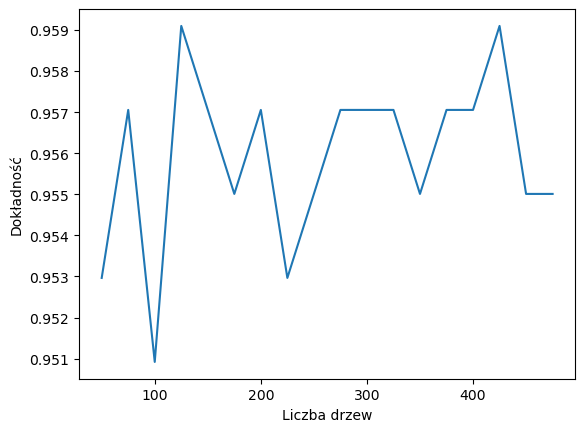

In [19]:
x = np.arange(50, 500, 25)
y = grid_pipeline_rf.cv_results_["mean_test_score"]

plt.plot(x, y)
plt.xlabel("Liczba drzew")
plt.ylabel("Dokładność")
plt.show()

### ExtraTrees


### Zadanie 4
----
Przygotuj model `ExtraTrees` dla danych z Zadania 1.

In [20]:
pipeline_extra = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 3)),
    ('scaler', StandardScaler()),
    ('rf', ExtraTreesClassifier())
])

pipeline_extra.fit(X_train, y_train.Class)

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                ('scaler', StandardScaler()), ('rf', ExtraTreesClassifier())])

In [21]:
modele.append("ExtraTrees")
acc_train.append(pipeline_extra.score(X_train, y_train.Class))
acc_test.append(pipeline_extra.score(X_test, y_test.Class))

### Boosting

<img src="boosting.webp"  width="500"/>

*https://medium.com/@brijesh_soni/understanding-boosting-in-machine-learning-a-comprehensive-guide-bdeaa1167a6*

### Zadanie 5
----
Przygotuj model `GradientBoostingClassifier` dla danych z Zadania 1.

In [22]:
pipeline_gradientboosting = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 3)),
    ('scaler', StandardScaler()),
    ('rf', GradientBoostingClassifier())
])

In [23]:
pipeline_gradientboosting.fit(X_train, y_train.Class)

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                ('scaler', StandardScaler()),
                ('rf', GradientBoostingClassifier())])

In [24]:
modele.append("GradientBoosting")
acc_train.append(pipeline_gradientboosting.score(X_train, y_train.Class))
acc_test.append(pipeline_gradientboosting.score(X_test, y_test.Class))

### Voting - komitety różnych modeli

### Zadanie 6
----
Przygotuj model wykorzystując funkcję `VotingClassifier()`. W tym celu wykorzystaj model regresji logistycznej, las losowy i k najbliższych sąsiadów.

In [25]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier(n_estimators=50)
clf3 = KNeighborsClassifier()

pipeline_ensembels = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 3)),
    ('scaler', StandardScaler()),
    ('eclf', VotingClassifier(estimators=[('lr', clf1),
                             ('rf', clf2),
                             ('knn', clf3)]))
])

pipeline_ensembels.fit(X_train, y_train.Class)

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                ('scaler', StandardScaler()),
                ('eclf',
                 VotingClassifier(estimators=[('lr', LogisticRegression()),
                                              ('rf',
                                               RandomForestClassifier(n_estimators=50)),
                                              ('knn',
                                               KNeighborsClassifier())]))])

In [26]:
modele.append("Voting")
acc_train.append(pipeline_ensembels.score(X_train, y_train.Class))
acc_test.append(pipeline_ensembels.score(X_test, y_test.Class))

In [27]:
results = pd.DataFrame({'model' : modele,
                        'acc_train' : acc_train,
                        'acc_test' : acc_test})

In [28]:
results

,model,acc_train,acc_test
0,BaggingClassifier50KNN,0.96728,0.990476
1,BaggingClassifier50KNNGridSearch,0.96319,0.990476
2,RandomForest,1.00000,0.990476
3,RandomForestGridSearch,1.00000,0.990476
4,ExtraTrees,1.00000,0.990476
5,GradientBoosting,1.00000,0.985714
6,Voting,0.97137,0.995238


<Axes: xlabel='acc_test', ylabel='model'>

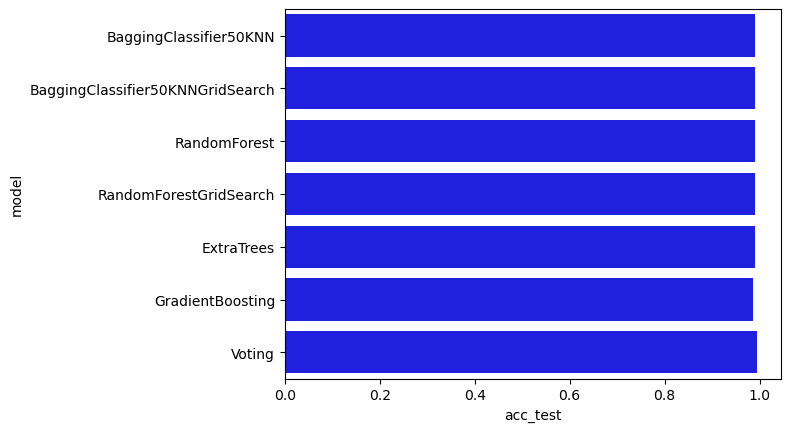

In [29]:
import seaborn as sns

sns.barplot(x = results.acc_test, y = results.model, color = "blue")